# 7.1 PyTorch

This notebook is an adaptation of the PyTorch Tutorial of Patrick Loeber which you can find [here](https://github.com/python-engineer/pytorchTutorial) (MIT License - Copyright (c) 2020 Patrick Loeber).

What is PyTorch?
- One of the most popular modern deep learning frameworks (next to Tensorflow, JAX)

Check out this Free Online Course to learn more:
- [Deep learning with PyTorch Free Online Course](https://www.youtube.com/watch?v=c36lUUr864M&t=8387s)

In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

Check if PyTorch can use your GPU (i.e. cuda is correctly installed and available). This is usually needed to train large-scale deep learning models.

In [2]:
torch.cuda.is_available()

False

## Tensor Basics

Tensors are generalizations of matrices to the N-dimensional space.

In [3]:
x = torch.empty(2, 2, 2, 3)
print(x)
print(x.size())

tensor([[[[ 2.8558e-14,  4.5783e-41,  2.7045e-43],
          [ 0.0000e+00, -9.8273e-25,  3.0875e-41]],

         [[-1.0137e-24,  3.0875e-41,  2.8549e-14],
          [ 4.5783e-41,  2.7326e-14,  4.5783e-41]]],


        [[[ 6.7262e-44,  0.0000e+00,  6.7262e-44],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  2.7429e-14],
          [ 4.5783e-41,  6.7352e+23,  4.5782e-41]]]])
torch.Size([2, 2, 2, 3])


In [4]:
x = torch.rand(3, 5)
print(x)

tensor([[0.7296, 0.8771, 0.7857, 0.3944, 0.3045],
        [0.0997, 0.6534, 0.7018, 0.9944, 0.4723],
        [0.7386, 0.3527, 0.4696, 0.5141, 0.5099]])


In [5]:
x = torch.zeros(2, 2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [6]:
print(x.dtype)

torch.float32


In [7]:
x = torch.ones(2, 2, dtype=torch.int)
print(x.dtype)

torch.int32


In [8]:
print(x.size())

torch.Size([2, 2])


In [9]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


In [10]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
z = x + y
print(x)
print(y)
print(z)

tensor([[0.4097, 0.3577],
        [0.1903, 0.6959]])
tensor([[0.3297, 0.0063],
        [0.2855, 0.6194]])
tensor([[0.7394, 0.3640],
        [0.4758, 1.3153]])


In [11]:
x = torch.rand(5, 3)
print(x)
print(x[:, 0])
print(x[1,1].item())

tensor([[0.6895, 0.9338, 0.6797],
        [0.6076, 0.1237, 0.2892],
        [0.1989, 0.2350, 0.5699],
        [0.4852, 0.5110, 0.8027],
        [0.6303, 0.3685, 0.1028]])
tensor([0.6895, 0.6076, 0.1989, 0.4852, 0.6303])
0.12369048595428467


In [12]:
x = torch.rand(4, 4)
print(x)
y = x.view(16)
print(y)
y = x.view(-1, 8)
print(y)

tensor([[0.5467, 0.5482, 0.2149, 0.1953],
        [0.7832, 0.5489, 0.3489, 0.1300],
        [0.7268, 0.9470, 0.4963, 0.1456],
        [0.5821, 0.7757, 0.8802, 0.8277]])
tensor([0.5467, 0.5482, 0.2149, 0.1953, 0.7832, 0.5489, 0.3489, 0.1300, 0.7268,
        0.9470, 0.4963, 0.1456, 0.5821, 0.7757, 0.8802, 0.8277])
tensor([[0.5467, 0.5482, 0.2149, 0.1953, 0.7832, 0.5489, 0.3489, 0.1300],
        [0.7268, 0.9470, 0.4963, 0.1456, 0.5821, 0.7757, 0.8802, 0.8277]])


In [13]:
a = torch.ones(5)
print(type(a))
b = a.numpy()
print(type(b))
print(a)
print(b)

# both objects share the same memory location when the tensor is on cpu
a += 1
print(a)
print(b)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [14]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [15]:
x = torch.ones(5, requires_grad=True) # calculate gradients for this vector in the optimization step
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Autograd

Calculating gradients automatically for the optimization. PyTorch will create a computation graph for backpropagation.

In [16]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x + 2
print(y)

tensor([-0.4714, -0.9677,  0.7668], requires_grad=True)
tensor([1.5286, 1.0323, 2.7668], grad_fn=<AddBackward0>)


In [17]:
z = (y*y*2)
# z = z.mean()
print(z)

tensor([ 4.6733,  2.1314, 15.3100], grad_fn=<MulBackward0>)


In [18]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # dz/dx -> chain rule dz/dy * dy/dx

In [19]:
print(x.grad)

tensor([0.6114, 4.1293, 0.0111])


In [20]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([1.5286, 1.0323, 2.7668])


In [21]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [22]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [23]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
 
# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Gradient Descent using Autograd

Linear Regression: Manual

In [24]:
import numpy as np

# f = w * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32) # feature vector
Y = np.array([2, 4, 6, 8], dtype=np.float32) # label vector w. ground truth
w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted -y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)**2
# dJ/dw = 1/N 2x (w*x-y)
def gradient(x, y, y_predicted):
    return np.dot(2 * x, y_predicted-y)/len(x)

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20
for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018677
epoch 5: w = 1.113, loss = 8.17471600
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698175
epoch 15: w = 1.825, loss = 0.31684822
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


In [25]:
import numpy as np

# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # feature vector
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # label vector w. ground truth
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted -y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20
for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad(): # exclude from computational graph
        w -= learning_rate * w.grad 
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


## PyTorch Training Pipeline

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

In [26]:
import numpy as np
import torch.nn as nn

# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # feature vector
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # label vector w. ground truth
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE


print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate) # stochastic gradient descent

for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


In [27]:
import numpy as np
import torch.nn as nn

# f = w * x

# f = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # feature vector
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # label vector w. ground truth

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim, bias):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim, bias)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size, False)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

# Training
learning_rate = 0.01
n_epochs = 20

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent

for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        [w,] = model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

4 1
Prediction before training: f(5) = 4.861
epoch 1: w = 1.126, loss = 7.92402315
epoch 3: w = 1.369, loss = 4.13638973
epoch 5: w = 1.544, loss = 2.15922141
epoch 7: w = 1.670, loss = 1.12712717
epoch 9: w = 1.762, loss = 0.58836746
epoch 11: w = 1.828, loss = 0.30713132
epoch 13: w = 1.876, loss = 0.16032438
epoch 15: w = 1.910, loss = 0.08369037
epoch 17: w = 1.935, loss = 0.04368686
epoch 19: w = 1.953, loss = 0.02280485
Prediction after training: f(5) = 9.801


## Linear Regression

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

epoch:10, loss = 4438.0674
epoch:20, loss = 3310.2754
epoch:30, loss = 2494.2073
epoch:40, loss = 1903.0739
epoch:50, loss = 1474.4543
epoch:60, loss = 1163.3877
epoch:70, loss = 937.4448
epoch:80, loss = 773.2043
epoch:90, loss = 653.7308
epoch:100, loss = 566.7659


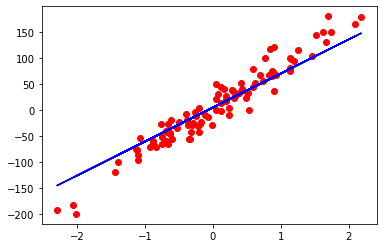

In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epochs = 100

for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch:{epoch+1}, loss = {loss.item():.4f}")
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

## Logistic Regression

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler() # 0 mean unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epochs = 100
for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch {epoch+1}, loss = {loss.item():.4f}")
              
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"accuracy = {acc:.4f}")

569 30
epoch 10, loss = 0.4071
epoch 20, loss = 0.3617
epoch 30, loss = 0.3288
epoch 40, loss = 0.3036
epoch 50, loss = 0.2836
epoch 60, loss = 0.2672
epoch 70, loss = 0.2535
epoch 80, loss = 0.2418
epoch 90, loss = 0.2316
epoch 100, loss = 0.2227
accuracy = 0.9035


## Dataset & DataLoader

Gradient calculations on whole training dataset is very time-consuming. Better way is to divide samples in so called batches.

In [30]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [31]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("../datasets/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [32]:
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [33]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [34]:
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.2930e+01, 3.8000e+00, 2.6500e+00, 1.8600e+01, 1.0200e+02, 2.4100e+00,
         2.4100e+00, 2.5000e-01, 1.9800e+00, 4.5000e+00, 1.0300e+00, 3.5200e+00,
         7.7000e+02],
        [1.3270e+01, 4.2800e+00, 2.2600e+00, 2.0000e+01, 1.2000e+02, 1.5900e+00,
         6.9000e-01, 4.3000e-01, 1.3500e+00, 1.0200e+01, 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.2370e+01, 1.1700e+00, 1.9200e+00, 1.9600e+01, 7.8000e+01, 2.1100e+00,
         2.0000e+00, 2.7000e-01, 1.0400e+00, 4.6800e+00, 1.1200e+00, 3.4800e+00,
         5.1000e+02],
        [1.2370e+01, 1.6300e+00, 2.3000e+00, 2.4500e+01, 8.8000e+01, 2.2200e+00,
         2.4500e+00, 4.0000e-01, 1.9000e+00, 2.1200e+00, 8.9000e-01, 2.7800e+00,
         3.4200e+02]]) tensor([[1.],
        [3.],
        [2.],
        [2.]])


In [35]:
# training loop
n_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward, update
        if (i+1) % 5 == 0:
            print(f"epoch {epoch+1}/{n_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}")

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## Dataset Transforms

In [36]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [37]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt("../datasets/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        # dataset[0]
        sample = self.x[index], self.y[index]
    
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
    
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [38]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [39]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


## Softmax & Cross-Entropy

In [40]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("Softmax numpy:", outputs)

Softmax numpy: [0.65900114 0.24243297 0.09856589]


In [41]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print("Softmax torch:", outputs)

Softmax torch: tensor([0.6590, 0.2424, 0.0986])


In [42]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

Y = np.array([1, 0, 0]) # one hot encoded
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"Loss 1 numpy: {l1:.4f}")
print(f"Loss 2 numpy: {l2:.4f}")

Loss 1 numpy: 0.3567
Loss 2 numpy: 2.3026


In [43]:
import torch.nn as nn

In [44]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # not one hot encoded
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # n_samples x n_classes = 1x3; logits (softmax is applied within CrossEntropyLoss()
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss 1 torch: {l1.item():.4f}")
print(f"Loss 2 torch: {l2.item():.4f}")

Loss 1 torch: 0.4170
Loss 2 torch: 1.8406


In [45]:
_, predictions1 = torch.max(Y_pred_good, 1) # choose highest probability
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


Loss in PyTorch allows for multiple examples simultaneously!

In [46]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([2, 0, 1]) # not one hot encoded
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # n_samples x n_classes = 3x3; logits (softmax is applied within CrossEntropyLoss()
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss 1 torch: {l1.item():.4f}")
print(f"Loss 2 torch: {l2.item():.4f}")

Loss 1 torch: 0.3018
Loss 2 torch: 1.6242


## Activation Functions

In [47]:
import torch.nn.functional as F

# Option 1 activation functions as modules
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
# option 2 activation function directly in forward pass
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x)) # some activation functions only available in functional API, e.g. F.leaky_relu()
        out = torch.sigmoid(self.linear2(out))
        return out
        

## Feed Forward Neural Network

### Dataset & DataLoader Setup

Dataset Sizes: {'train': 60000, 'val': 10000}
Class Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of Classes: 10
Image Size: torch.Size([1, 28, 28])


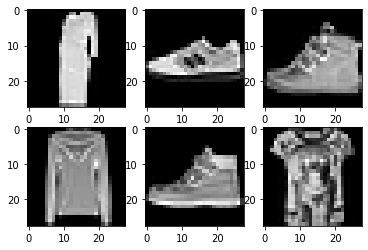

In [48]:
batch_size = 100

# Device config (GPU support)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Datasets & DataLoaders
datasets = {x: torchvision.datasets.FashionMNIST(root="../datasets", train=(x=="train"),
                                        download=True, transform=transforms.ToTensor())
                  for x in ["train", "val"]}

dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=0)
              for x in ["train", "val"]}


dataset_sizes = {x: len(datasets[x]) for x in ["train", "val"]}
class_names = datasets["train"].classes
n_classes = len(class_names)
examples = iter(dataloaders["train"])
samples, labels = examples.next()
input_size = samples.shape[2] * samples.shape[3] # 784 -> 28x28 images flattened
print(f"Dataset Sizes: {dataset_sizes}")
print(f"Class Names: {class_names}")
print(f"Number of Classes: {n_classes}")
print(f"Image Size: {samples.shape[1:]}")

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [49]:
# Training loop (batch training)
def train_model(model, criterion, optimizer, n_epochs=5, greyscale_to_rgb=False):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for images, labels in dataloaders[phase]:
                if greyscale_to_rgb == True:
                    images = images.repeat(1, 3, 1, 1).to(device)
                else:
                    images = images.to(device) # push to GPU if available
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(images)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * images.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase.capitalize() + ' Phase -> '} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best Val Acc: {best_acc:4f}")

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [50]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)
        
    def forward(self, x):
        x = x.reshape(-1, 28*28)
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [51]:
# Hyperparameters
hidden_size = 100
n_epochs = 15
learning_rate = 0.01

model = NeuralNet(input_size, hidden_size, n_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs)

Epoch 1/15
----------
Train Phase ->  Loss: 0.7008 Acc: 0.7601
Val Phase ->  Loss: 0.5083 Acc: 0.8221

Epoch 2/15
----------
Train Phase ->  Loss: 0.4684 Acc: 0.8362
Val Phase ->  Loss: 0.4732 Acc: 0.8322

Epoch 3/15
----------
Train Phase ->  Loss: 0.4295 Acc: 0.8492
Val Phase ->  Loss: 0.4550 Acc: 0.8371

Epoch 4/15
----------
Train Phase ->  Loss: 0.3998 Acc: 0.8581
Val Phase ->  Loss: 0.4253 Acc: 0.8480

Epoch 5/15
----------
Train Phase ->  Loss: 0.3780 Acc: 0.8660
Val Phase ->  Loss: 0.4091 Acc: 0.8545

Epoch 6/15
----------
Train Phase ->  Loss: 0.3628 Acc: 0.8707
Val Phase ->  Loss: 0.3963 Acc: 0.8578

Epoch 7/15
----------
Train Phase ->  Loss: 0.3525 Acc: 0.8744
Val Phase ->  Loss: 0.3872 Acc: 0.8625

Epoch 8/15
----------
Train Phase ->  Loss: 0.3410 Acc: 0.8772
Val Phase ->  Loss: 0.3937 Acc: 0.8614

Epoch 9/15
----------
Train Phase ->  Loss: 0.3294 Acc: 0.8815
Val Phase ->  Loss: 0.3750 Acc: 0.8670

Epoch 10/15
----------
Train Phase ->  Loss: 0.3219 Acc: 0.8835
Val Phase

## Convolutional Neural Network

In [52]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # x -> n, 1, 28, 28
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 12, 12
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 4, 4
        x = x.view(-1, 16 * 4 * 4)            # -> n, 256
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [53]:
# Hyperparameters
n_epochs = 15
learning_rate = 0.01

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs)

Epoch 1/15
----------
Train Phase ->  Loss: 1.0176 Acc: 0.6097
Val Phase ->  Loss: 0.6141 Acc: 0.7725

Epoch 2/15
----------
Train Phase ->  Loss: 0.5232 Acc: 0.8038
Val Phase ->  Loss: 0.4936 Acc: 0.8191

Epoch 3/15
----------
Train Phase ->  Loss: 0.4395 Acc: 0.8400
Val Phase ->  Loss: 0.4328 Acc: 0.8433

Epoch 4/15
----------
Train Phase ->  Loss: 0.3939 Acc: 0.8569
Val Phase ->  Loss: 0.4105 Acc: 0.8510

Epoch 5/15
----------
Train Phase ->  Loss: 0.3627 Acc: 0.8666
Val Phase ->  Loss: 0.3659 Acc: 0.8664

Epoch 6/15
----------
Train Phase ->  Loss: 0.3425 Acc: 0.8740
Val Phase ->  Loss: 0.3656 Acc: 0.8709

Epoch 7/15
----------
Train Phase ->  Loss: 0.3252 Acc: 0.8802
Val Phase ->  Loss: 0.3526 Acc: 0.8721

Epoch 8/15
----------
Train Phase ->  Loss: 0.3108 Acc: 0.8847
Val Phase ->  Loss: 0.3383 Acc: 0.8784

Epoch 9/15
----------
Train Phase ->  Loss: 0.3004 Acc: 0.8888
Val Phase ->  Loss: 0.3459 Acc: 0.8778

Epoch 10/15
----------
Train Phase ->  Loss: 0.2894 Acc: 0.8939
Val Phase

## Transfer Learning

What is Transfer Learning?
- Leverage a pretrained model that has been trained on huge amounts of similar data (e.g. here ImageNet)
- Fine-tune the model on your specific data
- Super popular nowadays, crucial for efficiency

In [54]:
# Hyperparameters
hidden_size = 100
n_epochs = 5
learning_rate = 0.01

model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs, greyscale_to_rgb=True)

/home/neslihankeskin/miniconda3/envs/datascience-bootcamp-7/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/neslihankeskin/miniconda3/envs/datascience-bootcamp-7/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/neslihankeskin/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 1/5
----------
Train Phase ->  Loss: 0.3725 Acc: 0.8685
Val Phase ->  Loss: 0.2862 Acc: 0.9012

Epoch 2/5
----------
Train Phase ->  Loss: 0.2417 Acc: 0.9125
Val Phase ->  Loss: 0.2716 Acc: 0.8990

Epoch 3/5
----------
Train Phase ->  Loss: 0.2037 Acc: 0.9255
Val Phase ->  Loss: 0.2255 Acc: 0.9178

Epoch 4/5
----------
Train Phase ->  Loss: 0.1782 Acc: 0.9343
Val Phase ->  Loss: 0.2409 Acc: 0.9099

Epoch 5/5
----------
Train Phase ->  Loss: 0.1605 Acc: 0.9408
Val Phase ->  Loss: 0.2533 Acc: 0.9161

Training complete in 6m 20s
Best Val Acc: 0.917800
